### Analysis: COVID numbers provided by John Hopkins University
- Data source: https://github.com/CSSEGISandData

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

sns.set()
rcParams['font.family'] = 'DejaVu Sans'
pd.options.display.max_columns = 500
pd.options.display.max_rows = 1000

In [2]:
global_confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
global_deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

confirmed_df = pd.read_csv(global_confirmed_url)
deaths_df = pd.read_csv(global_deaths_url)

# South American Countries
sa_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Peru',
    'Russia', 'India', 'Mexico'
]
# Very noisy:  'Ecuador', 'Paraguay', 'Uruguay', 'Venezuela'
confirmed_df = confirmed_df[confirmed_df['Country/Region'].isin(sa_countries)]
deaths_df = deaths_df[deaths_df['Country/Region'].isin(sa_countries)]

# Drop unneeded columns
drop_columns = ['Province/State', 'Lat', 'Long']
confirmed_df.drop(columns=drop_columns, inplace=True)
deaths_df.drop(columns=drop_columns, inplace=True)

In [3]:
print(confirmed_df.shape)
confirmed_df.head(1)

(9, 134)


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20
6,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428,4532,4681,4783,4887,5020,5208,5371,5611,5776,6034,6278,6563,6879,7134,7479,7805,8068,8371,8809,9283,9931,10649,11353,12076,12628,13228,13933,14702,15419,16214,16851,17415,18319


In [4]:
print(deaths_df.shape)
deaths_df.head(1)

(9, 134)


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20
6,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,4,6,8,9,13,18,19,23,27,28,36,39,43,44,48,56,63,72,82,83,90,97,102,111,115,123,129,132,136,147,152,165,176,185,192,197,207,214,218,225,237,246,260,264,273,282,293,300,305,314,319,329,353,356,363,373,382,393,403,416,433,445,452,467,484,500,508,520,528,539,556,569


In [5]:
# Aggregate across states to get total count for each date
# THIS CODE IS MEANT FOR THE STATES NOTEBOOK
grouped_confirmed = confirmed_df.groupby('Country/Region')[confirmed_df.columns].sum().reset_index()
grouped_deaths = deaths_df.groupby('Country/Region')[confirmed_df.columns].sum().reset_index()
grouped_confirmed.head()
# grouped_confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20
0,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428,4532,4681,4783,4887,5020,5208,5371,5611,5776,6034,6278,6563,6879,7134,7479,7805,8068,8371,8809,9283,9931,10649,11353,12076,12628,13228,13933,14702,15419,16214,16851,17415,18319
1,Bolivia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,10,10,11,11,12,12,15,19,24,27,29,32,43,61,74,81,97,107,115,123,132,139,157,183,194,210,264,268,275,300,330,354,397,441,465,493,520,564,598,609,703,807,866,950,1014,1053,1110,1167,1229,1470,1594,1681,1802,1886,2081,2266,2437,2556,2831,2964,3148,3372,3577,3826,4088,4263,4481,4919,5187,5579,5915,6263,6660,7136,7768,8387,8731,9592,9982,10531,10991
2,Brazil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,4,4,13,13,20,25,31,38,52,151,151,162,200,321,372,621,793,1021,1546,1924,2247,2554,2985,3417,3904,4256,4579,5717,6836,8044,9056,10360,11130,12161,14034,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682,36658,38654,40743,43079,45757,50036,54043,59324,63100,67446,73235,79685,87187,92202,97100,101826,108620,115455,126611,135773,146894,156061,162699,169594,178214,190137,203165,220291,233511,241080,255368,271885,291579,310087,330890,347398,363211,374898,391222,411821,438238,465166,498440,514849,526447,555383
3,Chile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,4,4,8,8,13,23,23,43,61,74,155,201,238,238,434,537,632,746,922,1142,1306,1610,1909,2139,2449,2738,3031,3404,3737,4161,4471,4815,5116,5546,5972,6501,6927,7213,7525,7917,8273,8807,9252,9730,10088,10507,10832,11296,11812,12306,12858,13331,13813,14365,14885,16023,17008,18435,19663,20643,22016,23048,24581,25972,27219,28866,30063,31721,34381,37040,39542,41428,43781,46059,49579,53617,57581,61857,65393,69102,73997,77961,82289,86943,90638,94858,99688,105158,108686
4,Colombia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,9,9,13,22,34,54,65,93,102,128,196,231,277,378,470,491,539,608,702,798,906,1065,1161,1267,1406,1485,1579,1780,2054,2223,2473,2709,2776,2852,2979,3105,3233,3439,3439,3792,3977,4149,4356,4561,4881,5142,5379,5597,5949,6207,6507,7006,7285,7668,7973,8613,8959,9456,10051,10495,11063,11613,12272,12930,13610,14216,14939,15574,16295,16935,17687,18330,19131,20177,21175,21981,23003,24104,24141,25406,26734,27219,29384,30593


In [6]:
dates = list(confirmed_df.columns[40:].values)    # Start from March 1

# Calculate number of new cases per day
daily_counts_confirmed = grouped_confirmed[dates].diff(axis=1)
daily_counts_deaths = grouped_deaths[dates].diff(axis=1)

# Calculate 7 day rolling average
rolling_avg_confirmed = daily_counts_confirmed[dates].rolling(7, axis=1).mean()
rolling_avg_deaths = daily_counts_deaths[dates].rolling(7, axis=1).mean()

# Add back state/province names
names = grouped_confirmed['Country/Region'].values
daily_counts_confirmed['Country/Region'] = names
daily_counts_deaths['Country/Region'] = names
rolling_avg_confirmed['Country/Region'] = names
rolling_avg_deaths['Country/Region'] = names

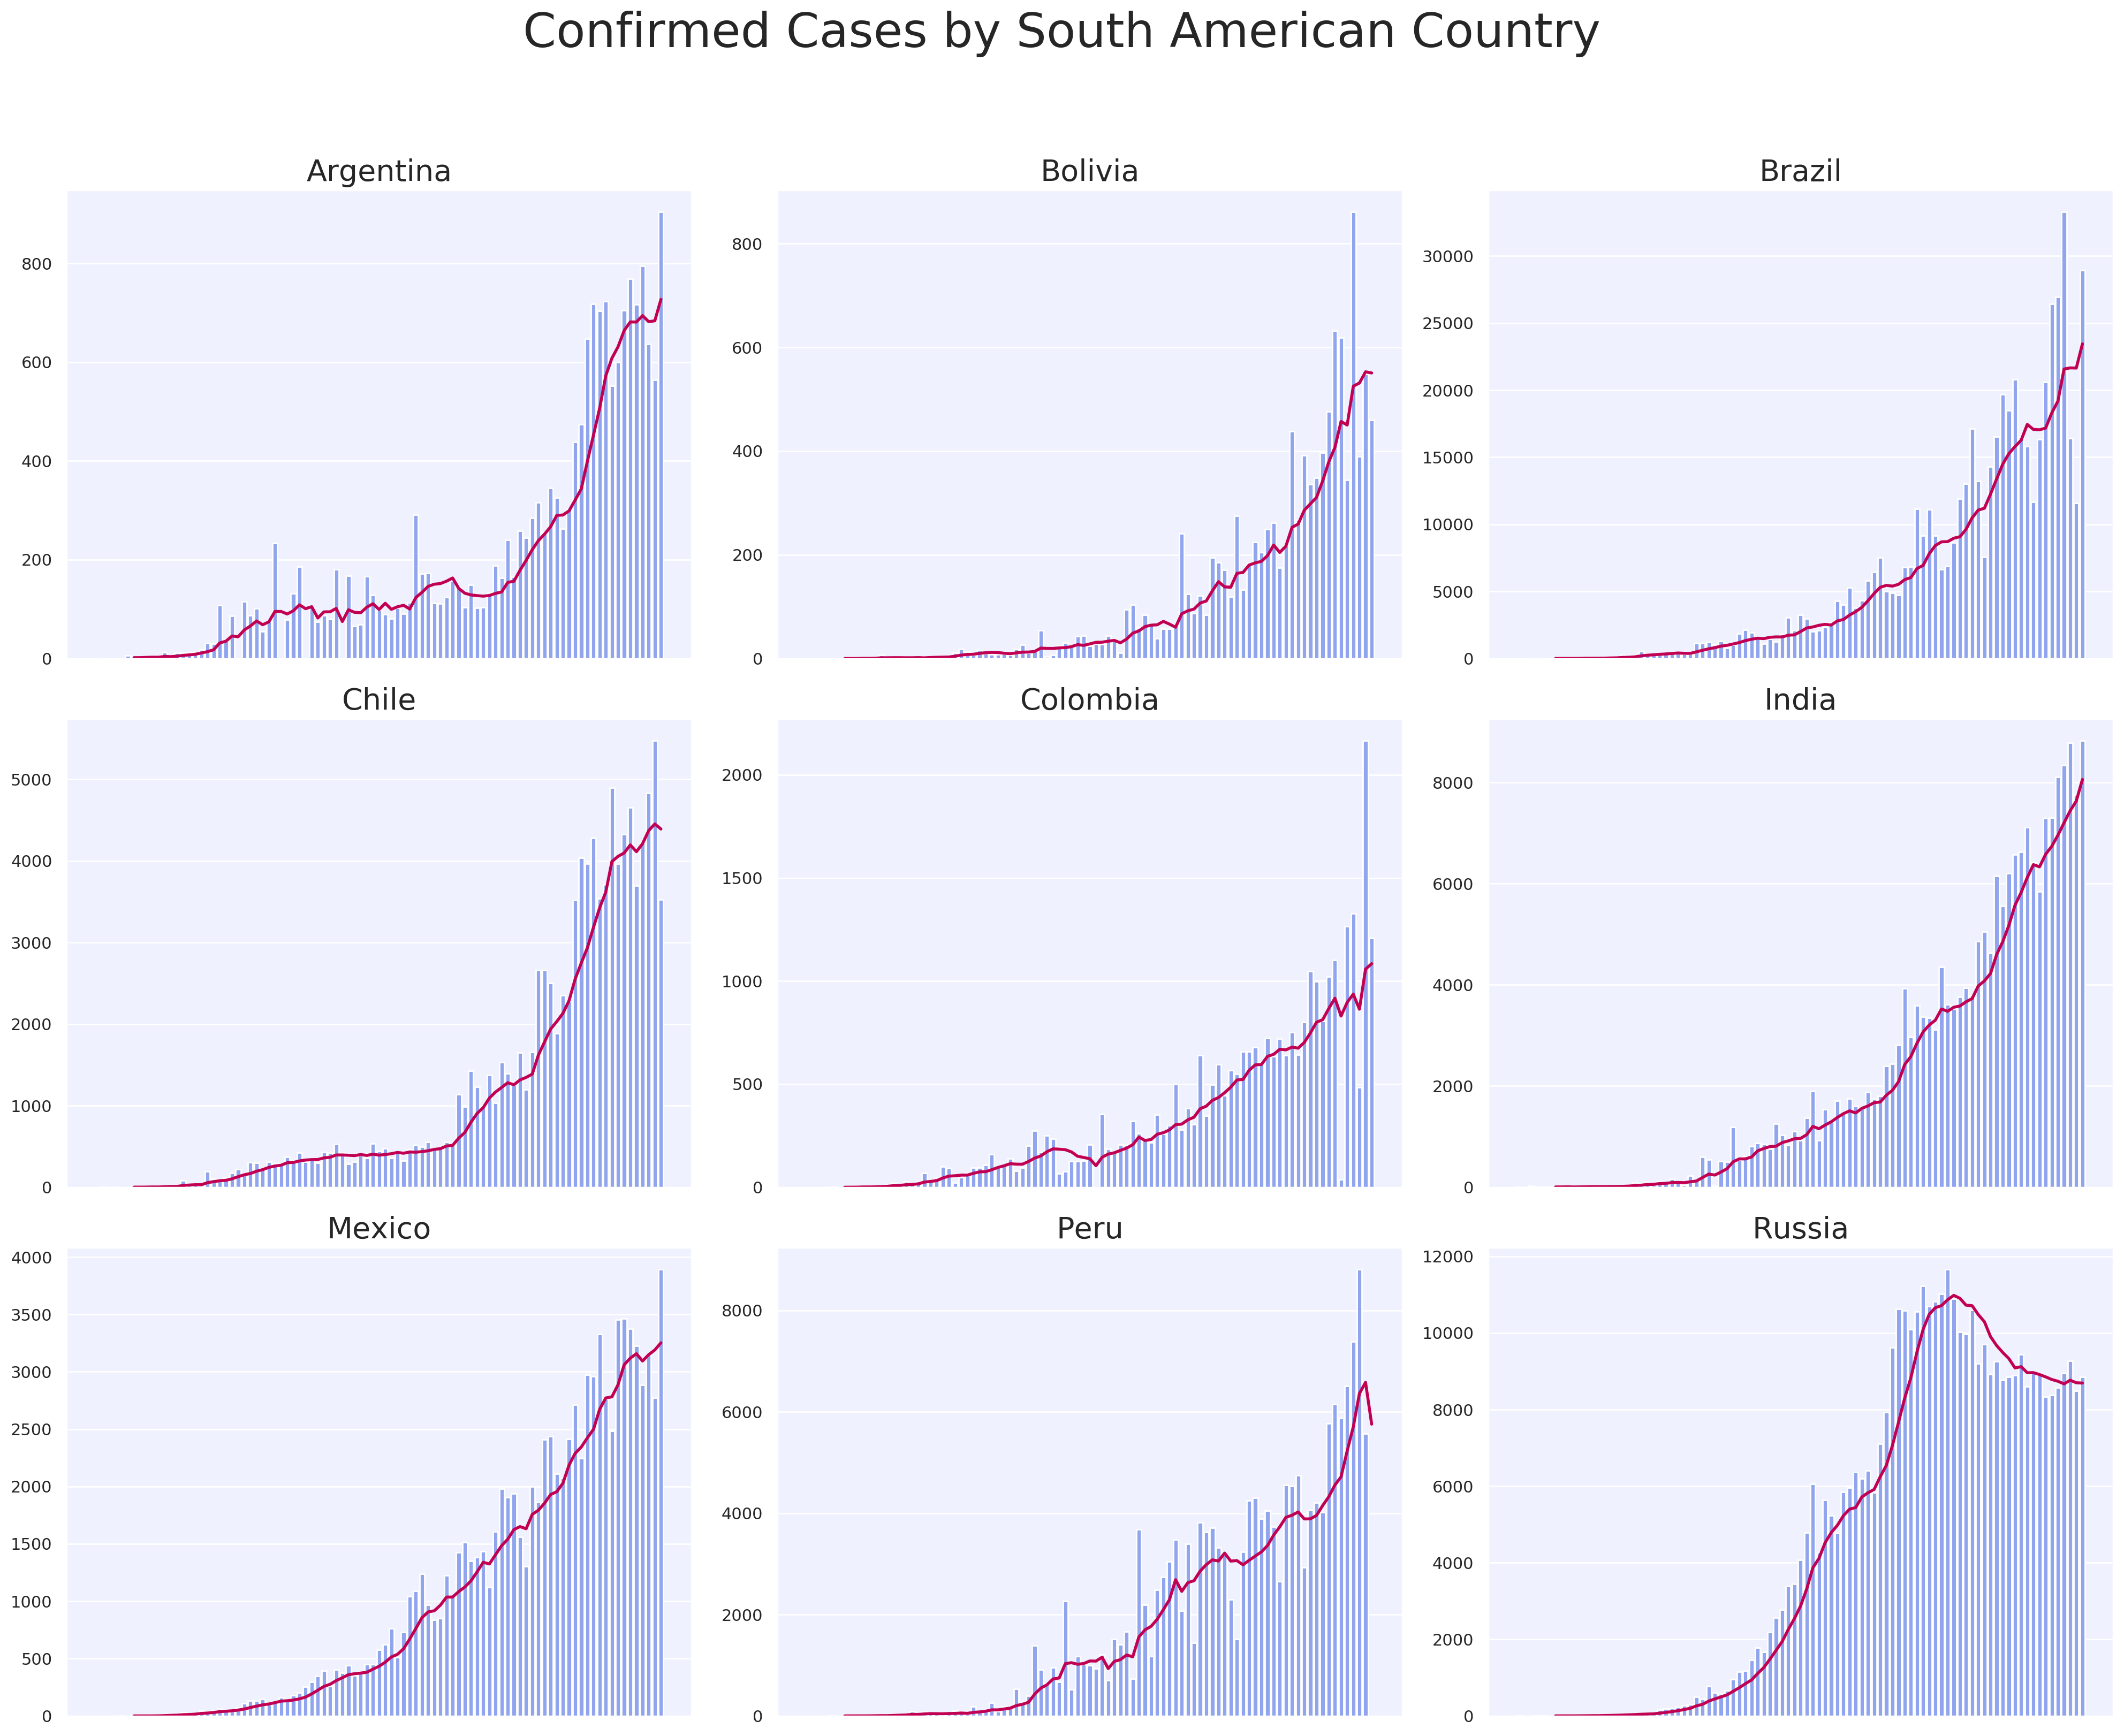

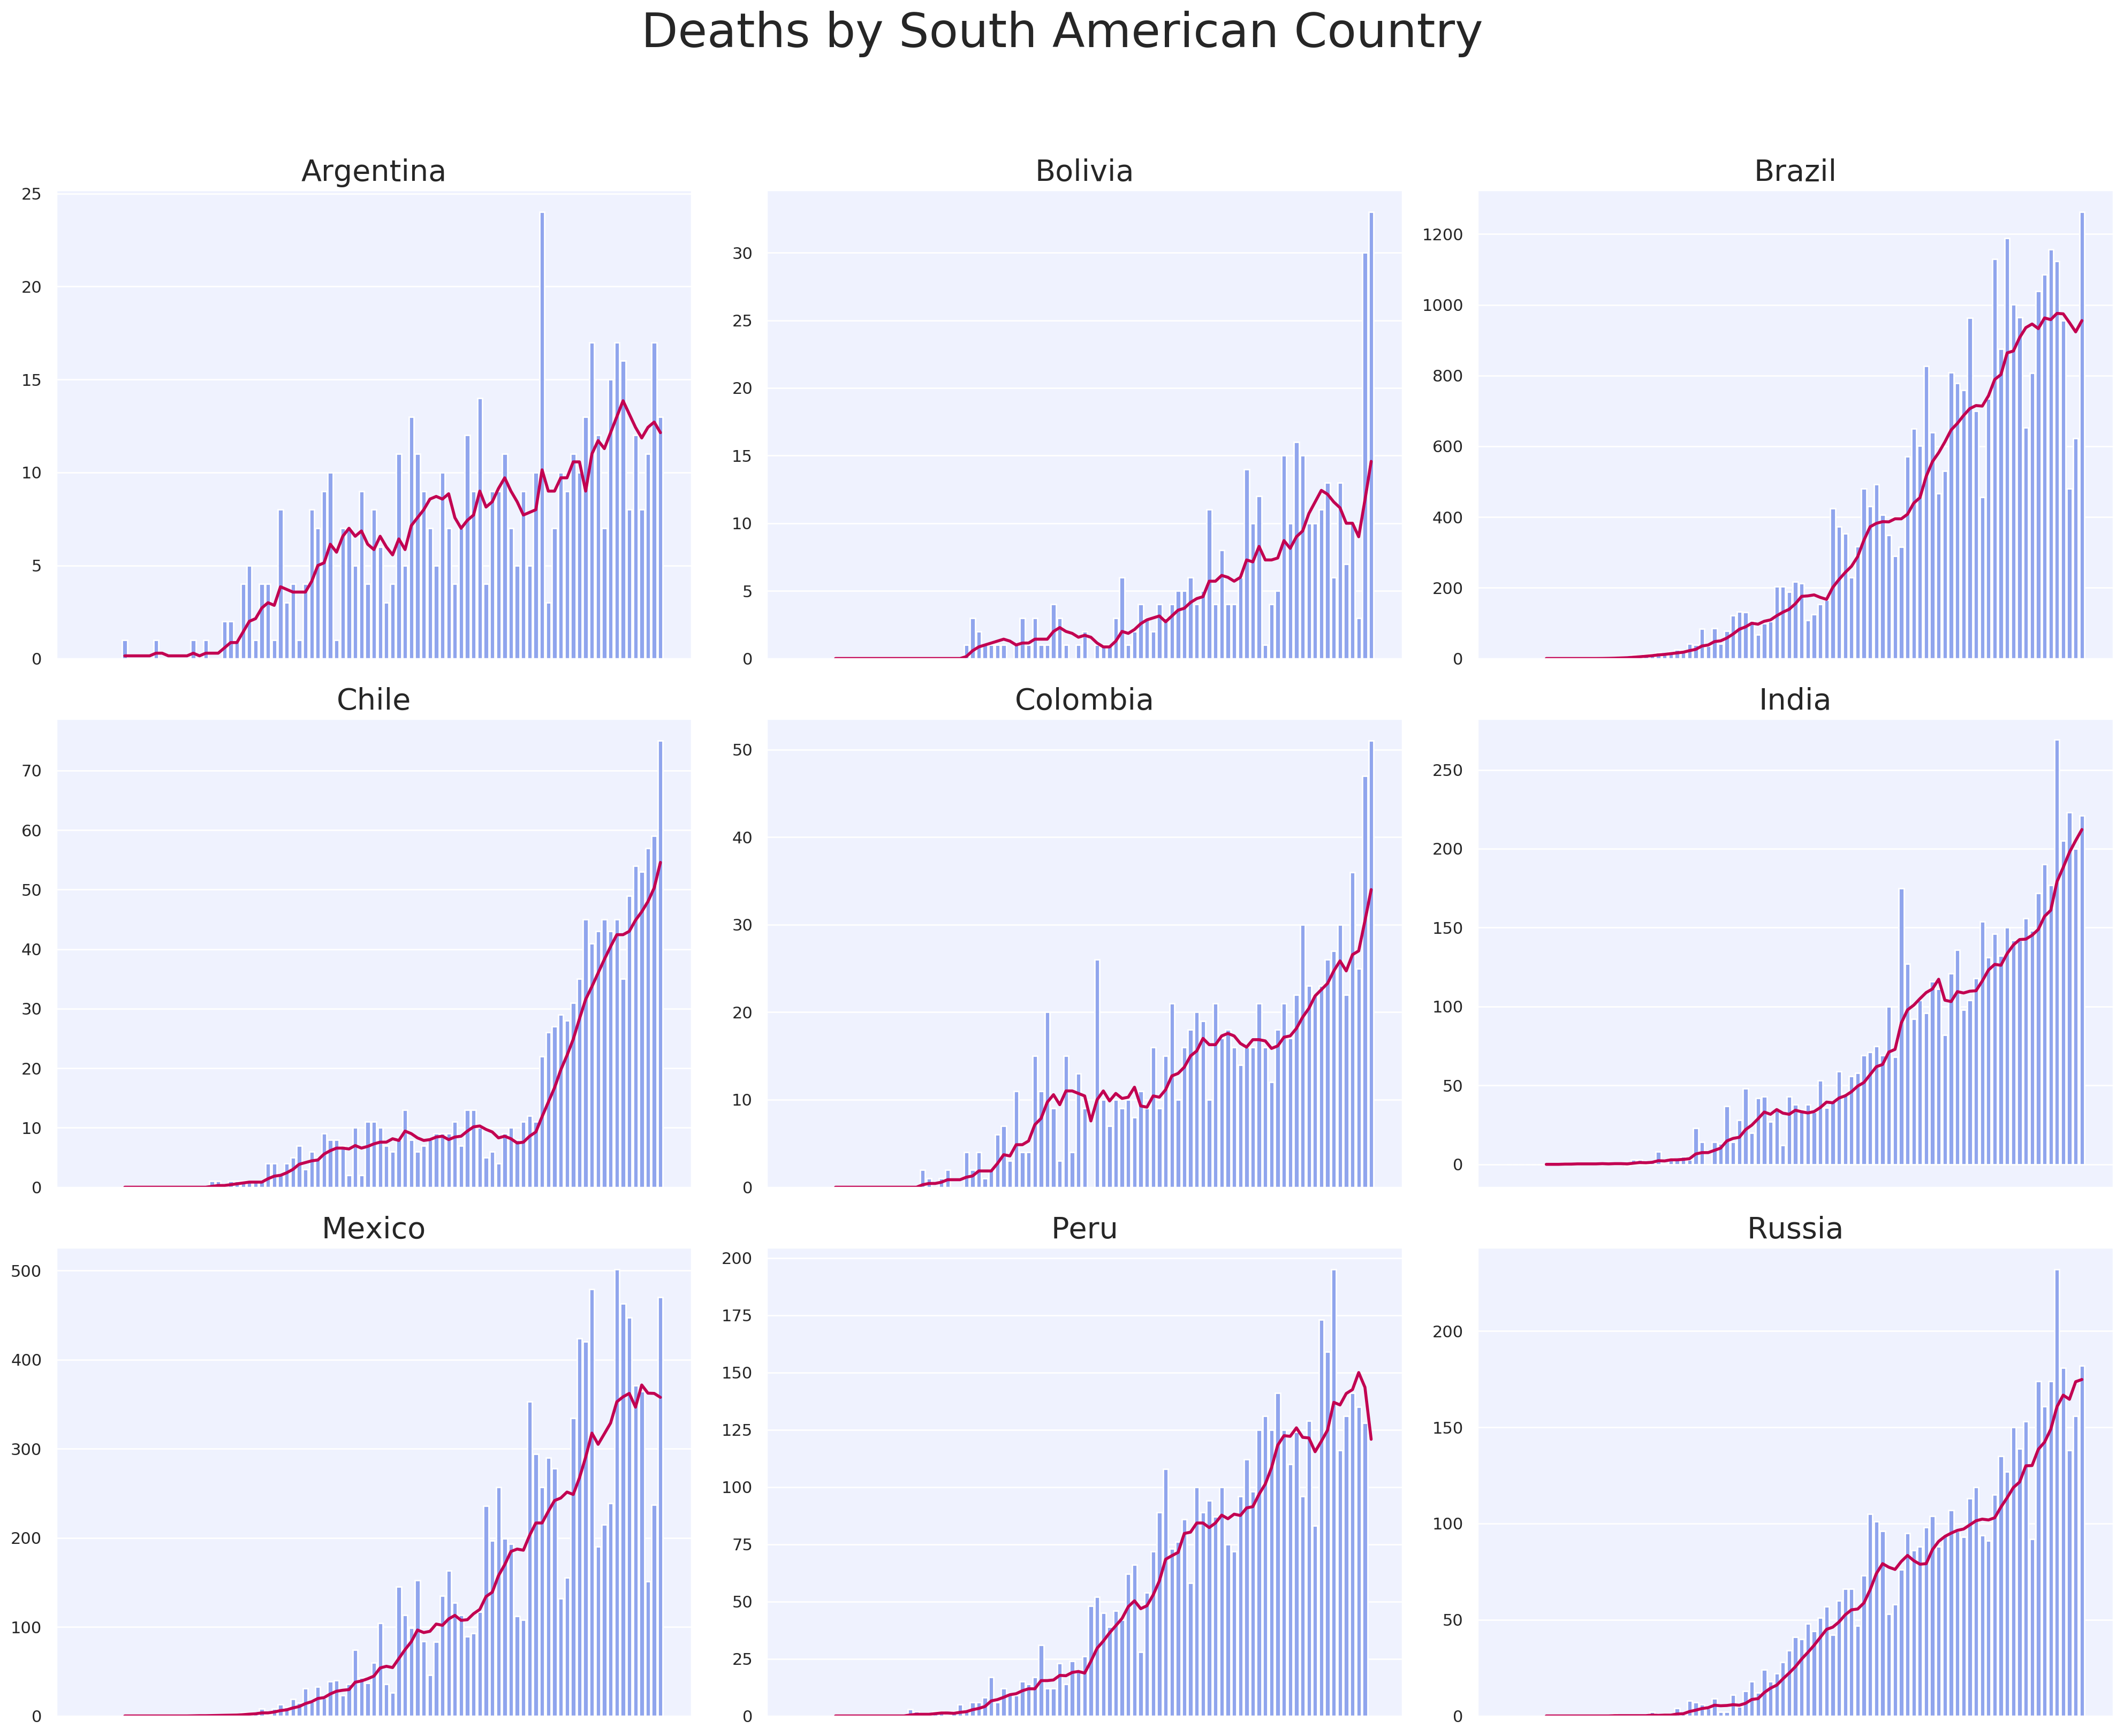

In [7]:
def counts_chart(counts, rolling_avg, title, file_name):
    '''Plot distribution of case counts and the rolling average'''
    
    # Fields of interest
    entity_field = 'Country/Region'
    dates = list(counts.columns)
    dates.remove(entity_field)
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15), dpi=200)
    fig.suptitle(title, fontsize=32, y=1.08)
    
    for index, ax in enumerate(axes.flatten()):
        
        # Isolate country
        entity = counts.loc[index, entity_field]     
        
        # Plot parameters
        ax.set_facecolor('#EFF2FE')
        ax.tick_params(labelbottom=False)
        ax.xaxis.grid(False)
        ax.set_title(entity, fontsize=20)
        
        # Plot: Distribution of counts per day
        ax.bar(dates, counts.loc[index, dates], color='#90A5ED', alpha=1.0, width=0.8)
        
        # Plot: Rolling Average
        ax.plot(dates, rolling_avg.loc[index, dates], c='#C20051', alpha=1.0, linewidth=2.0)
    
    plt.tight_layout()
    directory = '../images/'
    plt.savefig(os.path.join(directory, file_name), bbox_inches='tight', dpi=200)
    plt.show()
        
counts_chart(
    daily_counts_confirmed, rolling_avg_confirmed,
    'Confirmed Cases by South American Country',
    'sa_confirmed.png'
)
counts_chart(
    daily_counts_deaths, rolling_avg_deaths,
    'Deaths by South American Country',
    'sa_deaths.png'
)